# **Team MoodMasters NLP Hub**
<img src="https://github.com/yaznhijazii/FlipkartNLP/blob/main/IMG_7579.PNG?raw=true" alt="Alt Text" width="300"/>


## Welcome MoodMasters!

Greetings MoodMasters! 👋 Get ready to explore the fascinating realm of Natural Language Processing (NLP) and sentiment analysis.

- **BY : Yazan Hijazi**

Let's collectively master the art of mood analysis! 🌟📊🔮


#**Analyzing Flipkart Product Reviews with TextBlob**
<img src="https://github.com/yaznhijazii/FlipkartNLP/blob/main/1_Ud1zM4dy9e0Djy9syWg7BA.png?raw=true" alt="Alt Text" width="300"/>

#**Introduction To Flipkart**
Flipkart, a leading e-commerce platform, hosts a vast array of products, attracting millions of customers who provide valuable feedback through reviews. Analyzing these reviews is crucial for understanding customer sentiments and extracting meaningful insights.

In this Colab notebook, we'll explore the sentiment analysis of Flipkart product reviews using the TextBlob library.
#**Introduction To TextBlob library**

TextBlob is a powerful Python library built on top of NLTK and Pattern libraries, designed for processing textual data. It simplifies various natural language processing (NLP) tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.


Let's dive into the fascinating world of NLP and sentiment analysis to gain valuable insights into the sentiments expressed by Flipkart customers in their product reviews!


# **Download Library**
**!pip install textblob:** Installs the TextBlob library, a simple NLP (Natural Language Processing) library for processing textual data and performing common NLP tasks like sentiment analysis.

**!python -m spacy download en_core_web_sm:** Is used to download the English language model "en_core_web_sm" for the spaCy natural language processing library in Python.

**pip install pyspellchecker** : The pyspellchecker library in Python is typically used for spell checking


In [ ]:
!pip install textblob


In [ ]:
!python -m spacy download en_core_web_sm


2024-01-01 21:09:00.634992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 21:09:00.635068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 21:09:00.637167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 21:09:00.649788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 21:09:02.672064: W tensorflow/compiler/tf2

In [ ]:
pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.8 MB/s eta 0:00:00


# **Importing Libraries**

####Text Processing and Analysis
- `TextBlob` and `Word` from `textblob`: Used for natural language processing tasks such as sentiment analysis and lemmatization.

####Data Manipulation
- `pandas as pd`: A library for handling and analyzing tabular data.

####Visualization
- `matplotlib.pyplot as plt` and `seaborn as sns`: Libraries for basic and statistical data visualization, respectively.

####Machine Learning
- `TfidfVectorizer` and `CountVectorizer` from `sklearn.feature_extraction.text`: Tools for converting text data to numerical representations.
- `train_test_split` from `sklearn.model_selection`: Function for splitting data into training and testing sets.
-`MultinomialNB` in scikit-learn is a classifier based on Bayes' theorem, suitable for discrete data like word counts. It assumes independence between features, making it commonly used in text classification.
- `accuracy_score` and `classification_report` from `sklearn.metrics`: Metrics for evaluating classification models.

####Advanced Natural Language Processing
- `spacy`: An open-source library for advanced natural language processing tasks.

####Interactive Widgets
- `ipywidgets as widgets`: A library for creating interactive user interfaces.

####Display
- `display` from `IPython.display`: A function for displaying objects in the IPython environment.


In [ ]:
from textblob import TextBlob, Word
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import spacy
import ipywidgets as widgets
import string
from IPython.display import display
from spellchecker import SpellChecker


# **Read Data and Perform Data Cleaning**

In this section, we focus on reading the dataset and executing essential data cleaning tasks. A critical aspect of data preprocessing is handling null values to ensure the integrity of our analysis. Let's delve into the process:


In [ ]:
file_path = "/content/Flipkart.csv"
df= pd.read_csv(file_path, encoding='ISO-8859-1')
df

,ProductName,Price,Rate,Review,Summary
0,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,"Ã¢ÂÂ¹86,990",5,Terrific,Great product
1,Home Sizzler 153 cm (5.02 ft) Polyester Room D...,Ã¢ÂÂ¹299,5,Super!,"Amazing product, reasonable price"
2,Google Nest Mini (2nd Gen) with Google Assista...,"Â??3,499",5,Must buy!,It's just awesome.
3,LACT ENTERPRISE LACT FOLDABLE 4 BLADE LED LIGH...,Ã¢ÂÂ¹248,4,Delightful,Nice
4,Thomson Kitchen Master Pro+ MX03 750 W Juicer ...,"Â??2,709",2,Slightly disappointed,nice but during grading vice is very loudly
...,...,...,...,...,...
49995,CMerchants Multi Organiser BLue-4 Book Shelf M...,Ã¢ÂÂ¹625,5,Fabulous!,UpTo the mark that I want...Good product
49996,Eurodomo Hood Indigo PRO HC SC FL BK 60 Auto C...,"Â??7,599",4,Very Good,it's elegent.. user friendly
49997,D-Link DIR-825 AC1200 Wi-Fi Gigabit 1200 Mbps ...,"Â??2,499",1,Terrible product,Vary bad
49998,Bajaj DX 2 L/W Dry Iron,Â??529,5,Wonderful,Good product


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductName  50000 non-null  object
 1   Price        49999 non-null  object
 2   Rate         49999 non-null  object
 3   Review       49999 non-null  object
 4   Summary      49995 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

ProductName    0
Price          1
Rate           1
Review         1
Summary        5
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

# **Preprocessing Step**
Introduction to Preprocessing:
The preprocessing step is a fundamental stage in sentiment analysis, as it involves cleaning and transforming the raw text data to make it suitable for analysis. Here are some key preprocessing steps in sentiment analysis.

**Loading SpaCy Model:**

Loads the English language spaCy model for natural language processing.

**Defining Stop Words:**

Creates a set of stop words including common English words and additional negation-related terms.

**Text Cleaning Function:**

A function that performs several text cleaning operations on a DataFrame column.

**Column Type Conversion:**

Converts the data type of the specified DataFrame column to string.

**Lowercasing Text:**

Converts all text in the DataFrame column to lowercase.

**Removing Punctuation:**

Removes punctuation from the text in the DataFrame column.

**Stripping Whitespace:**

Removes leading and trailing whitespaces from the text in the DataFrame column.

**Removing Stop Words:**

Removes common stop words from the text in the DataFrame column.

**Lemmatization:**

Performs lemmatization on the text in the DataFrame column, reducing words to their base form.





In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS | {'not', 'no', 'never', 'none', 'nothing', 'nowhere', 'nor', 'neither', 'cannot'}
spell = SpellChecker()

def clean_column(df, column):
    df[column] = df[column].astype(str)
    df[column] = df[column].str.lower()
    df[column] = df[column].str.translate(str.maketrans('', '', string.punctuation))
    df[column] = df[column].str.strip()
    df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df[column] = df[column].apply(lambda sentence: ' '.join(spell.correction(word) if spell.correction(word) is not None else word for word in sentence.split()))
    df[column] = df[column].apply(lambda sentence: ' '.join([token.lemma_ for token in nlp(sentence)]))

    return df[column]


In [ ]:
df['CleanSummary'] = clean_column(df, 'Summary')

# **Create Textblob**
TextBlob is a Python library that simplifies natural language processing tasks, and here it evaluates the sentiment of cleaned textual summaries. The resulting sentiment scores offer insights into the overall emotional tone, distinguishing between positive, negative, or neutral sentiments within the provided text data.


In [ ]:
df['TextBlob'] = df['CleanSummary'].apply(lambda summary: TextBlob(summary).sentiment)

# **Sentiment analysis**
<img src="https://github.com/yaznhijazii/FlipkartNLP/blob/main/Social-Media-Sentiment-Analysis.jpg?raw=true" alt="Alt Text" width="300"/>

Determine the sentiment (positive, negative, neutral) expressed in a piece of text using TextBlob's sentiment analysis capabilities.

Sentiment Distribution:
Positive    40860
Neutral      4698
Negative     4437
Name: Sentiment, dtype: int64


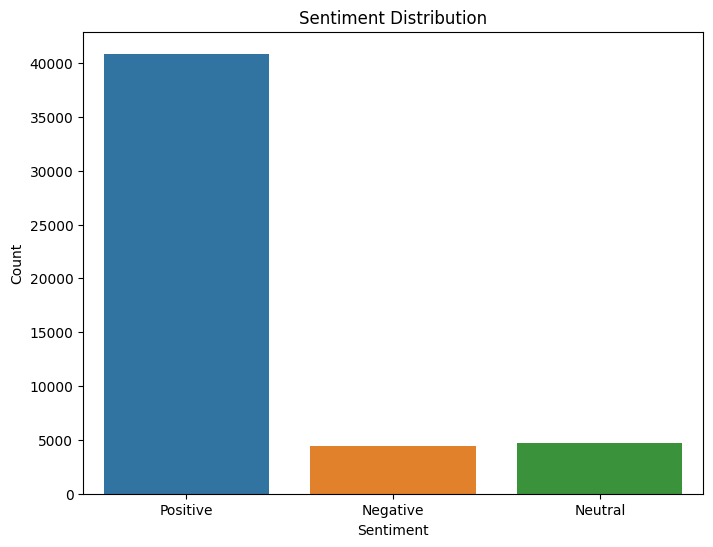

In [ ]:
df['Sentiment'] = df['TextBlob'].apply(lambda textblob: 'Positive' if textblob.polarity > 0 else ('Neutral' if textblob.polarity == 0 else 'Negative'))
sentiment_distribution = df['Sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# **N-Gram**
N-grams are contiguous sequences of n items (words in the context of NLP). TextBlob facilitates the extraction of N-grams, helping to capture patterns and relationships in the text.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['CleanSummary'], df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
class_labels = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train_numeric = y_train.map(class_labels)

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
class_weights = {0: 1, 1: 5, 2: 1}
sample_weights_train = compute_sample_weight(class_weights, y_train_numeric)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# **Model Building**
a Multinomial Naive Bayes model is trained using X_train_vectorized and y_train, representing the vectorized training data and corresponding labels.

In [ ]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train_numeric, sample_weight=sample_weights_train)
y_pred_numeric = model.predict(X_test_vectorized)
y_test_numeric = y_test.map(class_labels)
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report with Class Weights:")
print(classification_report(y_test_numeric, y_pred_numeric, target_names=class_labels.keys()))


Accuracy: 93.31%
Classification Report with Class Weights:
              precision    recall  f1-score   support

    Negative       0.94      0.72      0.81       888
     Neutral       0.72      0.79      0.76       947
    Positive       0.96      0.97      0.97      8164

    accuracy                           0.93      9999
   macro avg       0.87      0.83      0.85      9999
weighted avg       0.93      0.93      0.93      9999



# My GitHub Project

Check out my project on GitHub: [My Repository](https://github.com/yaznhijazii/FlipkartNLP/tree/main)
